Project description: Find a dataset with text data and analyze it the following way.

1) Output descriptive statistics of the dataset: mean, median, standard deviation. Do this for at least 3 numerical fields.
Plot at least 3 numerical fields.

2) Choose the plot type based on the data. It may make more sense to do a scatter plot, a regular plot, a histogram or something else.

3) Do at least 2 comparisons similar to the ones in the Titanic example. 
"What are the distributions of column A for different values of column B?" Output as either numbers or plots.

4) Describe your results in 2-3 paragraphs of text. What you can see from the plot, from the statistics and comparisons.

5*) For pilot students one of the requirements is to set up a web server using the Flask framework. Web Server interface should be one of the following: end users must be able to get required data using get-requests, html page or telegram-bot.


----------------
Additional notes:

1) Plots for tasks 2 and 3 are counted separately. So, your project has to have at least 5 plots in total.

2) Make sure your plots have proper legends, titles, axis titles, so that it’s easy to understand what the graph represents.

3) Try to format your project as a sequence of problems you’re solving. What the data looks like, what are some questions you can answer with the data. You should try to make a simple analysis project instead of doing exactly the bare minimum of tasks 1-4.

Project description: Find a dataset with text data and analyze it the following way.
1) Output descriptive statistics of the dataset: mean, median, standard deviation. Do this for at least 3 numerical fields. Plot at least 3 numerical fields.
2) Choose the plot type based on the data. It may make more sense to do a scatter plot, a regular plot, a histogram or something else.
3) Do at least 2 comparisons similar to the ones in the Titanic example. "What are the distributions of column A for different values of column B?" Output as either numbers or plots.
4) Describe your results in 2-3 paragraphs of text. What you can see from the plot, from the statistics and comparisons.
5*) For pilot students one of the requirements is to set up a web server using the Flask framework. Web Server interface should be one of the following: end users must be able to get required data using get-requests, html page or telegram-bot.
Additional notes:
1) Plots for tasks 2 and 3 are counted separately. So, your project has to have at least 5 plots in total.
2) Make sure your plots have proper legends, titles, axis titles, so that it’s easy to understand what the graph represents.
3) Try to format your project as a sequence of problems you’re solving. What the data looks like, what are some questions you can answer with the data. You should try to make a simple analysis project instead of doing exactly the bare minimum of tasks 1-4.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### My dataset contains information about footballers included in the top 100 best footballers in the world from 2007 to 2020. 
##### Publication "Guardian" has been providing information since 2012, while publication "FourFourTwo" since 2007.

In [4]:
import pandas as pd
df = pd.read_csv("fourfourtwoguardiantop100.csv")
df.head(10)

,Publication,Player,Club,Year,Rank
0,FourFourTwo,Kevin De Bruyne,Manchester City,2020,1
1,FourFourTwo,Lionel Messi,Barcelona,2020,2
2,FourFourTwo,Robert Lewandowski,Bayern Munich,2020,3
3,FourFourTwo,Neymar,PSG,2020,4
4,FourFourTwo,Kylian Mbappe,PSG,2020,5
5,FourFourTwo,Harry Kane,Tottenham,2020,6
6,FourFourTwo,Erling Haaland,Borussia Dortmund,2020,7
7,FourFourTwo,Bruno Fernandes,Manchester United,2020,8
8,FourFourTwo,Romelu Lukaku,Inter Milan,2020,9
9,FourFourTwo,Cristiano Ronaldo,Juventus,2020,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Publication  2250 non-null   object
 1   Player       2250 non-null   object
 2   Club         2250 non-null   object
 3   Year         2250 non-null   int64 
 4   Rank         2250 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 88.0+ KB


In [6]:
df.describe()

,Year,Rank
count,2250.000000,2250.000000
mean,2014.355556,49.943556
std,3.689575,28.867091
min,2007.000000,1.000000
25%,2012.000000,25.000000
50%,2015.000000,49.000000
75%,2017.000000,75.000000
max,2020.000000,100.000000


Description: Output descriptive statistics of the dataset (colomns: Year, Rank).

#### 

In [7]:
Barcelona = df['Club'] == 'Barcelona'
Barcelona.describe()

count      2250
unique        2
top       False
freq       2027
Name: Club, dtype: object

Description: Output descriptive statistics of the dataset of Barcelona's players.

### 

### How many footballers have each publication noted?

In [8]:
df['Publication'].value_counts()

FourFourTwo    1350
Guardian        900
Name: Publication, dtype: int64

<BarContainer object of 2 artists>

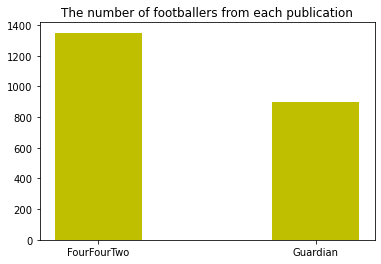

In [131]:
plt.title('The number of footballers from each publication')
plt.bar(['FourFourTwo','Guardian'],
        [len(df[df['Publication'] == 'FourFourTwo']),len(df[df['Publication'] == 'Guardian'])],
        width = 0.4, color = 'y')

Description: The graph provides information about how many players were mentioned by each publication. "FourFourTwo" published slightly less that 1400, while "Guardian" published 900 footballers.

### 

### How many footballers from each club have been posted?

In [22]:
df['Club'].value_counts()

Real Madrid             241
Barcelona               223
Bayern Munich           174
Chelsea                 153
Manchester City         142
                       ... 
Guangzhou Evergrande      1
Los Angeles Galaxy        1
Real                      1
Corinithians              1
Stuttgart                 1
Name: Club, Length: 131, dtype: int64

### 

### What's the most popular name among all footballers?

In [10]:
def get_first_name(full_name):
    first_name = full_name.split()[0]
    return first_name

names = df['Player'].apply(get_first_name)
print(names.value_counts().index[0])

Sergio


Description: it is not surprising that the name Sergio is the most common in the entire ranking. The Spanish Premier League (which includes a huge number of Spaniards) is one of the best in the world, which is why many players from this league often figure in the rankings of the best players. Moreover, Sergio is the most common Spanish name. Combining these two facts, we get the name Sergio as the most common in the entire ranking.

##  

##### FC Barcelona has always been my favorite club, so most of the information will be related to this club.

### How many representatives of 'Barcelona' were in the top-100 footballers of the year in 2015? 
Note: Barcelona won the treble that year. It's the highest achievement for any football club, which includes winning three major tournaments of the season.

In [11]:
print('The number of Barca players in 2015:'
      ,len(df[(df['Club'] == 'Barcelona') & (df['Year'] == 2015) & (df['Publication'] == 'FourFourTwo')].index))

The number of Barca players in 2015: 9


### 

### Compare the percentage of ranked players from the winning and losing teams in the Champions League final from 2012 to 2020.

Note: (The "Winner" array's element [i]) contains the club that won the (Finalist [i]) in (Years [i]) in the tournament.
The output contains 2 columns: winners and finalists. The columns contain the percentage of Champions League winners and finalists out of 100 ranked players in a given year.

In [12]:
Winner = ['Chelsea','Bayern Munich','Real Madrid','Barcelona','Real Madrid','Real Madrid','Real Madrid','Liverpool','Bayern Munich']
Finalist = ['Bayern Munich','Borussia Dortmund','Atletico Madrid','Juventus','Atletico Madrid','Juventus','Liverpool','Tottenham Hotspur','PSG']
Years = [2012,2013,2014,2015,2016,2017,2018,2019,2020]

won = []
lost = []

for i in range(len(Years)):
    won.append(len(df[(df['Club'] == Winner[i]) & 
                          (df['Year'] == Years[i]) & 
                          (df['Publication'] == 'FourFourTwo')].index))
    
    lost.append(len(df[(df['Club'] == Finalist[i]) & 
                          (df['Year'] == Years[i]) & 
                          (df['Publication'] == 'FourFourTwo')].index))

dataFrame = pd.DataFrame(
    {'Winner': won, 'Finalist': lost}, index=Years
)
dataFrame

,Winner,Finalist
2012,7,9
2013,12,8
2014,11,6
2015,9,7
2016,11,6
2017,14,6
2018,11,6
2019,9,5
2020,7,4


Description: For instance, let's look at the first row. The output shows that in 2012 there were 7 out of 100 ranked footballers from the winning team, this means 7%, the same thing with the finalists, 9% ranked players.

### 

In [13]:
dataFrame.describe()

,Winner,Finalist
count,9.000000,9.000000
mean,10.111111,6.333333
std,2.315407,1.500000
min,7.000000,4.000000
25%,9.000000,6.000000
50%,11.000000,6.000000
75%,11.000000,7.000000
max,14.000000,9.000000


Description: Output descriptive statistics of the dataset.

#### Show data from dataFrame using graph.

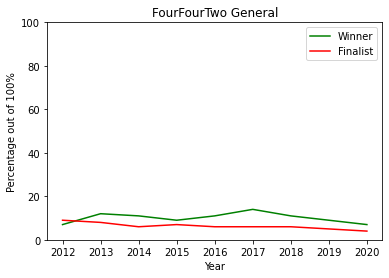

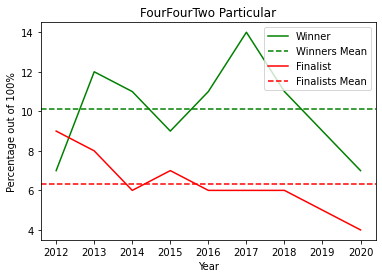

In [84]:
from statistics import mean 


# General Graph
plt.plot(Years, won, label = 'Winner', color = 'g')
plt.plot(Years, lost, label = 'Finalist', color = 'r')

plt.title('FourFourTwo General')
plt.xlabel('Year')
plt.ylabel('Percentage out of 100%')
plt.ylim(0,100)
plt.legend()
plt.show()

# More Details
plt.plot(Years, won, label = 'Winner', color = 'g')
plt.axhline(y=mean(won), color='g', linestyle='--', label = 'Winners Mean')

plt.plot(Years, lost, label = 'Finalist', color = 'r')
plt.axhline(y=mean(lost), color='r', linestyle='--', label = 'Finalists Mean')
plt.legend()

plt.title('FourFourTwo Particular')
plt.xlabel('Year')
plt.ylabel('Percentage out of 100%')
plt.legend()
plt.show()

## 

### Illustrate the changes in the number of clubs in the rankings each year between 2007 and 2020.

In [96]:
years = sorted(list(set(df['Year'])))
clubs_number =[]

for i in range(len(years)):
    clubs_number.append((len(set(df['Club'][(df['Year'] == years[i])]))))
    
dataFrame = pd.DataFrame({'Number of clubs':clubs_number}, index=years)
dataFrame

,Number of clubs
2007,30
2008,30
2009,26
2010,28
2011,30
2012,51
2013,38
2014,34
2015,44
2016,36


In [97]:
dataFrame.describe()

,Number of clubs
count,14.000000
mean,34.285714
std,6.843622
min,26.000000
25%,30.000000
50%,33.500000
75%,37.500000
max,51.000000


Description: Output descriptive statistics of the dataset.

#### Show data using graph.

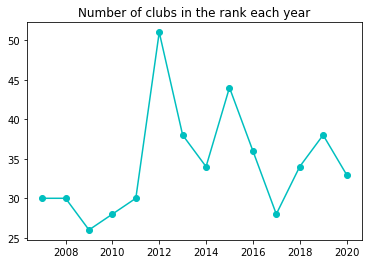

In [136]:
plt.title('Number of clubs in the rank each year')
plt.plot(years, clubs_number,'co-')

Description: on this graph you can see a number of clubs in the rank each year from 2007 to 2020. In 2007 there were 30 different clubs presented in the rank from dataset. The peak was at 51 different clubs in 2012. In 2020 there were 33 clubs.

### 

### Present the players who took 1st Rank in the period between 2007 to 2020. If the player meets several times, output the number of his awards. (Data should be different for each publication.)

In [15]:
best_FourFourTwo = []
best_Guardian = []

for current in range(2007,2021):
    FourFourTwo = df['Player'][(df['Rank'] == 1) & (df['Year'] == current) & (df['Publication'] == 'FourFourTwo')]
    best_FourFourTwo.append(*FourFourTwo)

for current in range(2012,2021):
    Guardian = df['Player'][(df['Rank'] == 1) & (df['Year'] == current) & (df['Publication'] == 'Guardian')]
    best_Guardian.append(*Guardian)

from collections import Counter, defaultdict
best_442 = Counter(best_FourFourTwo)
best_Guard = Counter(best_Guardian)

#### Show data using graph.

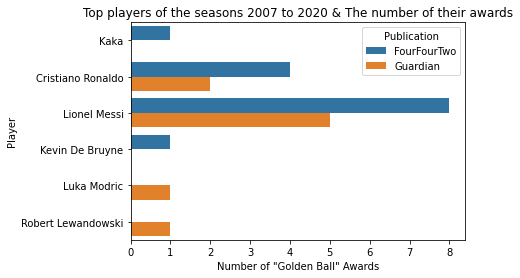

In [16]:
df1=pd.DataFrame({'Number of "Golden Ball" Awards': best_442.values(),'Player':best_442.keys()})
df2=pd.DataFrame({'Number of "Golden Ball" Awards': best_Guard.values(),'Player':best_Guard.keys()})
df1['Publication']='FourFourTwo'
df2['Publication']='Guardian'
res=pd.concat([df1,df2])
plt.title('Top players of the seasons 2007 to 2020 & The number of their awards')
sns.barplot(x='Number of "Golden Ball" Awards',y='Player',data=res,hue='Publication')
plt.show()

Describtion: this graph provides data that we can claim that Messi has been the best player since 2007, because he has more "Golden Ball" Awards than others.

### 

### Display the percentage of players for each club in the ranking. Show data using a pie chart.

In [17]:
from collections import Counter, defaultdict
df['Club'].value_counts() 


Real Madrid             241
Barcelona               223
Bayern Munich           174
Chelsea                 153
Manchester City         142
                       ... 
Guangzhou Evergrande      1
Los Angeles Galaxy        1
Real                      1
Corinithians              1
Stuttgart                 1
Name: Club, Length: 131, dtype: int64

In [18]:
from collections import Counter, defaultdict
number = []
clubs = []
others =0

number_clubs = dict(Counter(df['Club'].to_numpy()))

for item in number_clubs.items():
        if item[1] > 50:
            clubs.append(item[0])
            number.append(item[1])
        else:
            others += item[1]
            
clubs.append('Other Clubs')
number.append(others)

df3=pd.DataFrame({'Clubs': clubs,'Number':number})

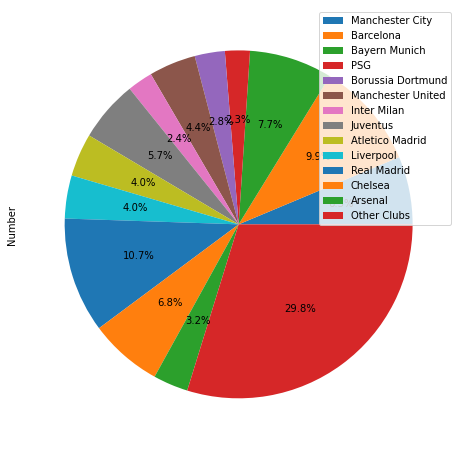

In [21]:
my_labels = df3['Clubs']
ax = df3['Number'].plot(kind='pie', figsize=(12,8), autopct='%1.1f%%', labels=None)
plt.legend(loc=1, labels=my_labels)

Description: This pie chart shows the number of representatives for each club. If there are less than 50 representatives in the entire rating, then the club is not shown and is included in the "Other Clubs" sector.